In [1]:
from analytical import *
from analytical import pc_profile as apc
from numerical import pc_profile as npc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
import os
import utilities as utl

In [2]:
Na = 20
dT = 100

plt.rcParams["figure.figsize"] = (12, 8)

In [3]:
t0 = 0
tf = 3600 * 24 * 1
d = 150
D = 50
n = 4
q = 0.2
sigma_vv = 0.001
ptype = 'TP'


In [4]:
default_kwargs = {'t0': t0, 
        'tf' : tf,
        'd' : d, 
        'D' : D,
        'q' : q,
        'sigma_vv' : sigma_vv,
        'N' : N,
        'dT' : dT,
        'ptype' : ptype,
        'Na' : Na,
        'n' : n
        }

In [5]:
def analytic_sweep(default_kwargs, parameter_name, parameter_list):

    kwargs = dict(default_kwargs)

    n = len(parameter_list)
    pbar = tqdm(total=n)

    results_sweep_list = []
    
    for p in parameter_list:
        results_sweep_dict = {}

        kwargs[parameter_name] = p

        kwargs['ptype'] = 'IP'
        x, y_ip = apc(**kwargs)
        results_sweep_dict['time'] = x
        results_sweep_dict['IP'] = y_ip

        kwargs['ptype'] = 'TP'
        x, y_tp = apc(**kwargs)
        results_sweep_dict['TP'] = y_tp

        results_sweep_dict[parameter_name] = p
        
        results_sweep_list.append(results_sweep_dict)

        pbar.update(1)

    pbar.close()

    results_sweep_df = pd.DataFrame(data=results_sweep_list)

    return results_sweep_df


def plot_df(df, parameter_name, result='IP', tag=None, save=False, legend_flag=True, plog=False):
    index = df.index.values
    fig, ax = plt.subplots()
    legend = []

    for ids in index:
        xp = df.iloc[ids]['time']
        yp = df.iloc[ids][result]
        if plog is True:
            ax.semilogy(xp, yp)
        else:
            ax.plot(xp, yp)
        legend.append(parameter_name + '=' + str(df.iloc[ids][parameter_name]))
        
    if legend_flag: ax.legend(legend)

    ax.set_title(str(result) + " variation over " + str(parameter_name))

    if save:
        os.makedirs(figures_path, exist_ok=True)
        if tag==None: tag = parameter_name
        fig.savefig(figures_path + tag + '.jpg', dpi=300, format='jpg')


    return fig, ax

def plot_df_2(df, parameter_name, result='IP', tag=None, save=False, legend_flag=True, plog=False):
    index = df.index.values
    fig, ax = plt.subplots()
    legend = []

    for ids in index:
        xp = df.iloc[ids]['time']
        yp1 = df.iloc[ids]['TP']
        yp2 = df.iloc[ids]['IP']
        if plog is True:
            line, = ax.semilogy(xp, yp1)
            ax.semilogy(xp, yp2, color = line.get_color(), linestyle = ':')
        else:
            line, = ax.plot(xp, yp1)
            ax.plot(xp, yp2, color = line.get_color(), linestyle = ':')
        legend.append(parameter_name + '=' + str(df.iloc[ids][parameter_name]) + ' IP')
        legend.append(parameter_name + '=' + str(df.iloc[ids][parameter_name]) + ' TP')
        
    if legend_flag: ax.legend(legend)

    ax.set_title(str("IP-TP") + " variation over " + str(parameter_name))

    if save:
        os.makedirs(figures_path, exist_ok=True)
        if tag==None: tag = parameter_name
        fig.savefig(figures_path + tag + '.jpg', dpi=300, format='jpg')


    return fig, ax

# Example

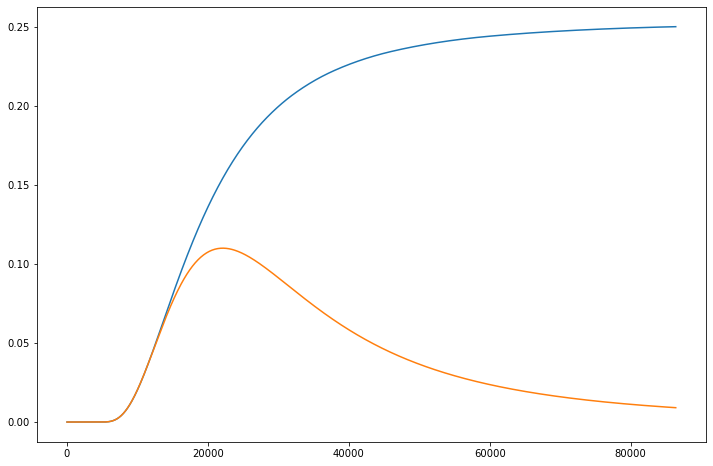

In [6]:
kwargs = dict(default_kwargs)
x, y = apc(**kwargs)
plt.plot(x, y)
xplot, yplot = pc_profile(t0, tf, d, D, n, q, sigma_vv, N=N, dT=dT, ptype='IP')
plt.plot(xplot, yplot)

# Variation over q

In [7]:
parameter_name = 'q'
parameter_list = [0.1, 0.2, 0.5, 1, 2, 5]

q_asweep_df = analytic_sweep(default_kwargs, parameter_name, parameter_list)


100%|██████████| 6/6 [00:08<00:00,  1.44s/it]


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:title={'center':'TP variation over q'}>)

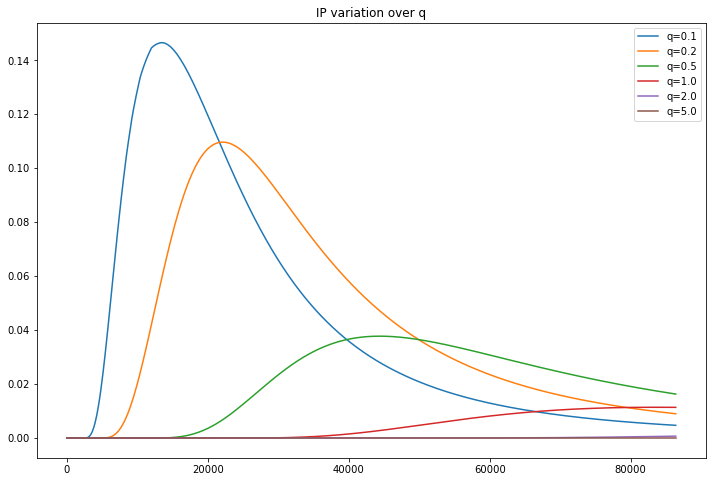

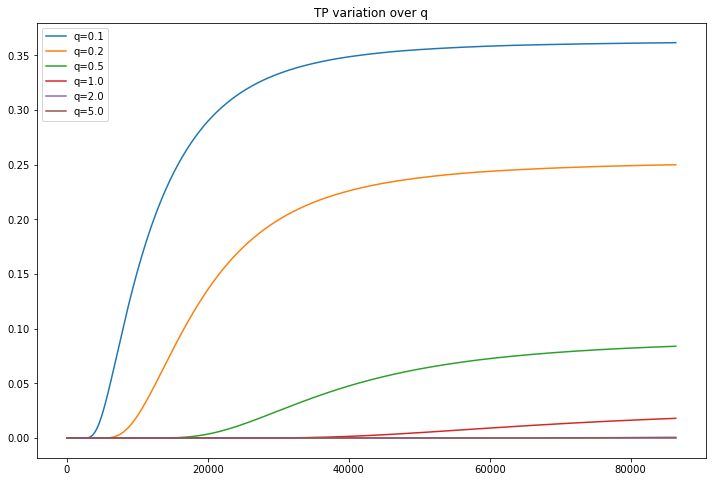

In [8]:
plot_df(q_asweep_df, 'q', result='IP', tag='q_asweep_IP', save=False)
plot_df(q_asweep_df, 'q', result='TP', tag='q_asweep_TP', save=False)

$k = \frac{\sigma_{vu}}{\sigma_{vv}}=\frac{1}{q}$

Si $k > 1$, se conoce mejor la velocidad en la dirección longitudinal que en las laterales. En cambio, si $k < 1$ entonces la incertidumbre en la velocidad relativa en dirección longitudinal es menor.

Se puede observar en las figuras que el valor de $k$ tiene un gran impacto en el riesgo de colisión. Cuanto menor sea, menor será el riesgo de colisión. Esto quiere decir que cuanto mejor se controle la velocidad en la dirección longitudinal, menor será el riesgo de colisión.

# Variation over $\sigma_{vv}$

In [9]:
parameter_name = 'sigma_vv'
parameter_list = [0.001, 0.002, 0.005]

q_asweep_df = analytic_sweep(default_kwargs, parameter_name, parameter_list)

100%|██████████| 3/3 [00:06<00:00,  2.31s/it]


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:title={'center':'TP variation over sigma_vv'}>)

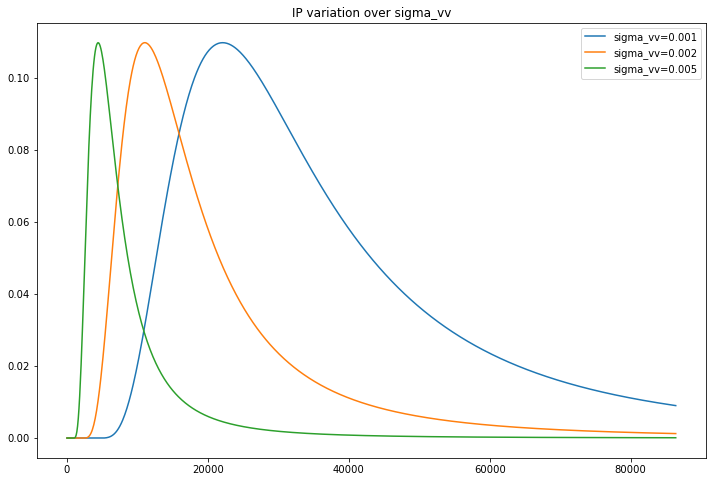

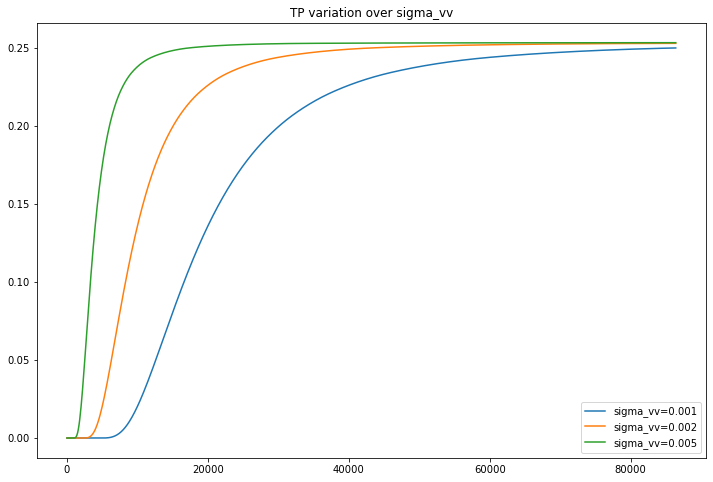

In [10]:
plot_df(q_asweep_df, 'sigma_vv', result='IP', tag='sigma_vv_asweep_IP', save=False)
plot_df(q_asweep_df, 'sigma_vv', result='TP', tag='sigma_vv_asweep_TP', save=False)

# Variation over d

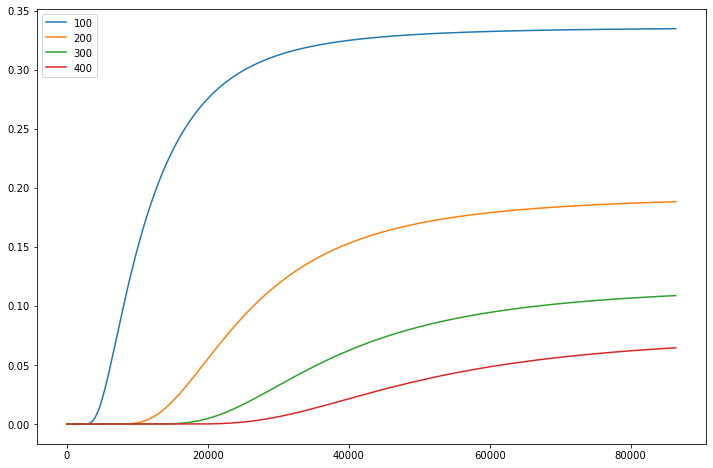

In [11]:

d_list = [100, 200, 300, 400]
legend = []

for d in d_list:
    xplot, yplot = pc_profile(t0, tf, d, D, n, q, sigma_vv, N=N, dT=dT)
    plt.plot(xplot, yplot)
    legend.append(str(int(d)))
plt.legend(legend)

La distancia entre los satélites ($d$) también tiene un efecto notable en el riesgo de colisión. Cuanto mayor sea la distancia más lentamente aumentará la probabilidad de colisión y menor será el valor máximo.

# Variation over D

In [12]:
parameter_name = 'D'
parameter_list = [1, 2, 5, 10]

D_asweep_df = analytic_sweep(default_kwargs, parameter_name, parameter_list)

100%|██████████| 4/4 [00:06<00:00,  1.51s/it]


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:title={'center':'IP-TP variation over D'}>)

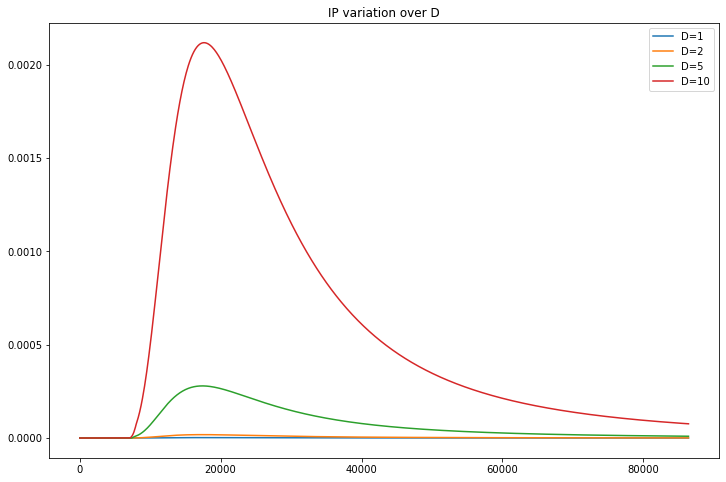

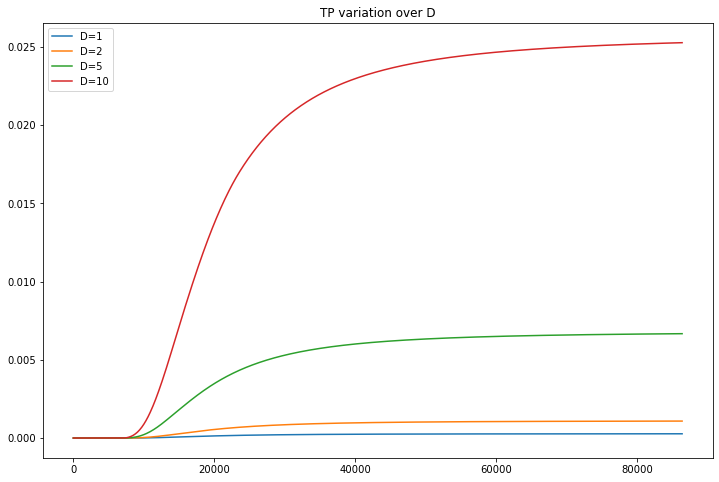

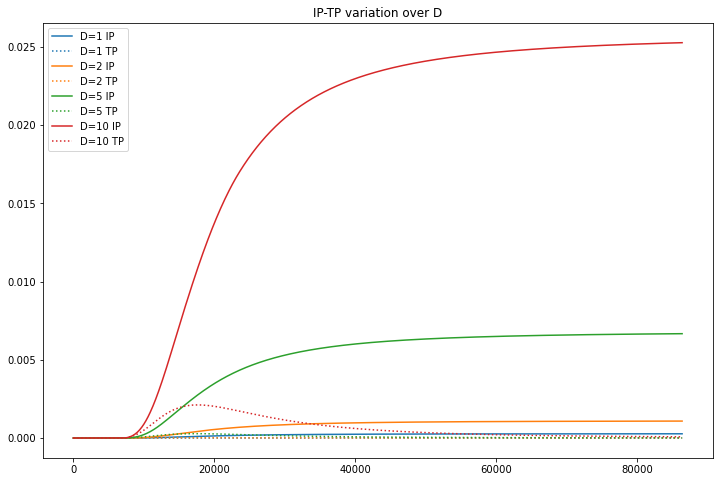

In [13]:
plot_df(D_asweep_df, 'D', result='IP', tag='D_asweep_IP', save=False, plog=False)
plot_df(D_asweep_df, 'D', result='TP', tag='D_asweep_TP', save=False, plog=False)
plot_df_2(D_asweep_df, 'D', result='TP', tag='D_asweep_TP', save=False, plog=False)

In [14]:
parameter_name = 'D'
parameter_list = [10, 20, 50]

D_asweep_df_2 = analytic_sweep(default_kwargs, parameter_name, parameter_list)

100%|██████████| 3/3 [00:05<00:00,  1.96s/it]


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:title={'center':'IP-TP variation over D'}>)

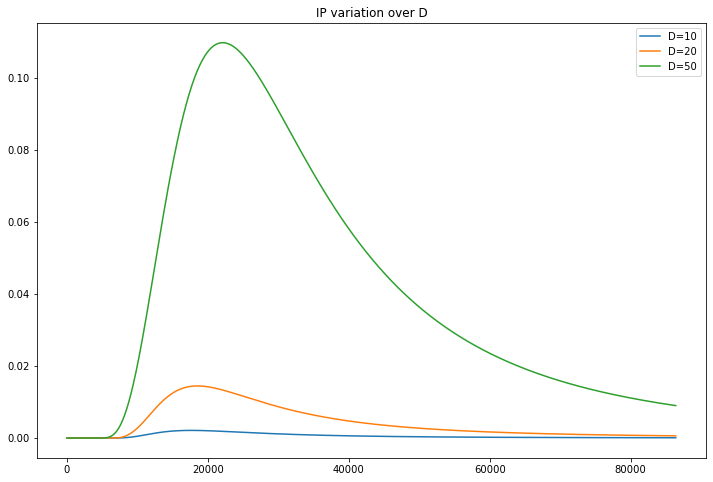

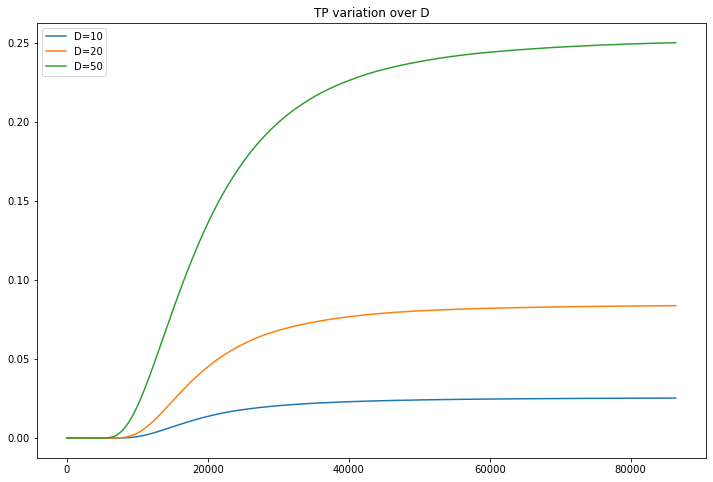

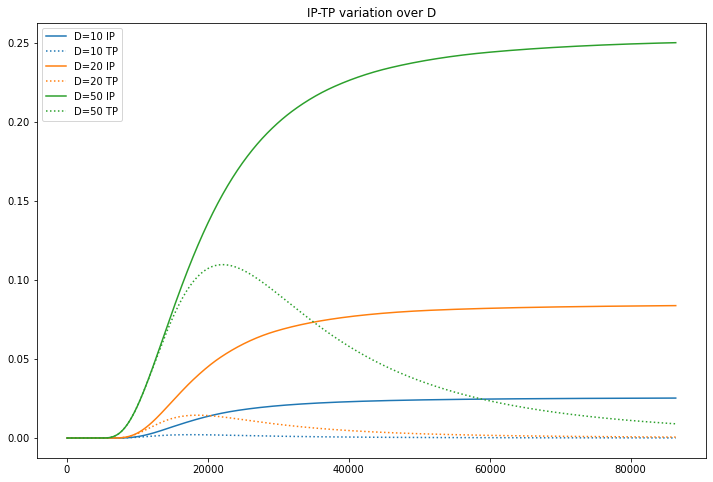

In [15]:
plot_df(D_asweep_df_2, 'D', result='IP', tag='D_asweep_IP', save=False, plog=False)
plot_df(D_asweep_df_2, 'D', result='TP', tag='D_asweep_TP', save=False, plog=False)
plot_df_2(D_asweep_df_2, 'D', result='TP', tag='D_asweep_TP', save=False, plog=False)

In [16]:
region_times(d, 50, 2, q, sigma_vv)

(35000.0, 45000.0, 47871.35538781691)

In [17]:
ids = 2
D_asweep_df_2.time.iloc[0][np.where(D_asweep_df_2.IP.iloc[ids]==D_asweep_df_2.IP.iloc[ids].max())[0][0]]

22100.0